# Tutorial 2 (Introduction to AI), Part 2

# Classification in AI

# Scikit-Learn: efficient tools for data analysis

Scikit-learn provides a range of supervised and unsupervised learning algorithms, and associating tools, via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

- **NumPy**: Base n-dimensional array package
- **SciPy**: Fundamental library for scientific computing
- **Matplotlib**: Comprehensive 2D/3D plotting
- **IPython**: Enhanced interactive console
- **Sympy**: Symbolic mathematics
- **Pandas**: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The library is focused on modelling data. It is not focused on loading, manipulating and summarizing data. For these features, refer to **NumPy** and **Pandas**.

Some popular groups of models provided by scikit-learn include:

- **Datasets**: for toy and real datasets and for generating datasets with specific properties for investigating model behaviour.
- **Supervised Models**: a vast array not limited to perceptron, decision trees, naive bayes, neural networks, support vector machines.
- **performance metrics** methods to measure how well a model is working
- **Training splits** and **Cross Validation**: for estimating the performance of supervised models on unseen data.
- **Clustering**: for grouping unlabeled data such as KMeans.
- **Dimensionality Reduction**: for reducing the number of attributes in data for summarization, visualization and feature selection such as Principal Component Analysis.
- **Ensemble methods**: for combining the predictions of multiple supervised models.
- **Feature extraction**: for defining attributes in image and text data.
- **Feature selection**: for identifying meaningful attributes from which to create supervised models.
- **Parameter Tuning**: for getting the most out of supervised models.

# Installing scikit-learn

Scikit-learn is almost certainly already part of your Acaconda distribution.

Scikit-learn requires:

- Python (>= 3.4)
- NumPy (>= 1.8.2)
- SciPy (>= 0.13.3)

If it isn't and if you already have a working installation of numpy and scipy, the easiest way to install scikit-learn is using **pip**

- pip install -U scikit-learn

or **conda**:

- conda install scikit-learn

## 1. Datasets

Scikit-learn comes with a collection of datasets.  Some of these are small, and some are larger.  We will be working with these a lot. 

We need to import these datasets from scikit-learn.  They come as structured data, a dictionary-like object, with attributes including **data**, **target**, **feature_names**, **target_names**

https://scikit-learn.org/stable/datasets.html

In this first example we will work with the Wisconsin breast cancer dataset.

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
cancer = datasets.load_breast_cancer()

#get data (often called X) and target (often called y) 
X = cancer.data
y = cancer.target
#X and y are numpy arrays.  These have a shape attribute, telling
#you the dimension of the array. Let's display their shape
print(X.shape)
print(y.shape)

(569, 30)
(569,)


That is, X is a 569 x 30 array (569 rows of data, with 30 attributes), and y is a single column of 569 labels.

## 2. Representation of data

The best way to think about data within Scikit-Learn is in terms of tables of data.

#### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. 

Here, we take the data loaded from scikit-learn and place it into a pandas DataFrame, then display the first five rows (the head). 

In [7]:
#convert the data to a dataframe for display
df = pd.DataFrame(data=np.c_[cancer.data,cancer.target],columns=np.append(cancer.feature_names,'target'))

#Note: you can also get these sklearn datasets directly as dataframes
#Uncomment the line below to do this
#cancer_df = datasets.load_breast_cancer(as_frame=True).frame

#display data structure and first five rowsHere each row of the data refers to a single patient, 
#and the number of rows is the total number of patient in the dataset. 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*. By convention, this features matrix is often stored in a variable named *X*. The features matrix is assumed to be two-dimensional, with shape *[n_samples, n_features]*, and is most often contained in a NumPy array or a Pandas *DataFrame*.

The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are often real-valued, but may be Boolean or discrete-valued (eg text) in some cases.

#### Target array

In addition to the feature matrix *X*, we also generally work with a **label** or **target** array, which by convention we will usually call *y*. The target array is usually one dimensional, with length *n_samples*, and is generally contained in a NumPy array or Pandas *Series*. The target array may have continuous numerical values, or discrete classes/labels. While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, *[n_samples, n_targets]* target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data* (in statistical terms, it is the dependent variable). For example, in the preceding data we may wish to construct a model that can predict the *diagnosis* on the other measurements, this being considered the target array.

## 3. Binary classification


Binary classification is used to create a model that classifies between only two classes.  These two classes are often called "positive" and "negative".  The current dataset is labelled as to whether a tumour is cancerous (malignant, 1) or not (benign, 0).  The iris dataset, which we will see in Part 2, is not binary, because there are three classes (3 types of iris).

Let's print some of the labels (y), entries 0 to 4, then 399 to 403, in the array.

In [8]:
print(y[0:5])
print(y[399:404])

[0 0 0 0 0]
[1 0 1 1 1]


## 4. Training and Testing

It is very important that we evaluate an AI model based on its ability to predict data that it has never seen before.  Because of this we often divide the training data into a validation and training set.  The AI model will learn from the training data, but ultimately be evaluated based on the testing data.

* **Training Data** (In Sample Data) - The data that the machine learning model was fit to/created from. 
* **Testing Data** (Out of Sample Data) - The data that the machine learning model is evaluated upon after it is fit to the training data.

There are two predominant means of dealing with training and testing data:

* **Training/Testing Split** - The data are split according to some ratio between a training and testing (hold-out) set.  Common ratios are 80% training and 20% test.
* **K-Fold Cross Validation** - The data are split into a number of folds and models.  Because a number of models equal to the folds is created out-of-sample predictions can be generated for the entire dataset.

### Validation

When tuning parameters of a model it's important not to tune them to the testing set. Sometimes, training data is split into training data and validation data, with the validation used to assess the model, before a final round of testing is performed on a (hold out) testing set.


### Training/Testing Split

The code below performs a split of the cancer data into a training and testing set.  The training set uses 80% of the data and the testing set uses 20%.

The method below both splits the dataset into training and validation set and also randomises the data.  We often want our results to replicable, so supply a **random_state** value so that when run again, the same split is made.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## 5. Scikit-Learn's  API

The Scikit-Learn API is designed with the following guiding principles in mind:

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every ML algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of ML applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the **fit()** method of the model instance.
5. Apply the Model to new data:

- For supervised learning, often we predict labels for unknown data using the **predict()** method.
- For unsupervised learning, we often transform or infer properties of the data using the **transform()** or **predict()** method.

We will now step through several simple examples of applying supervised learning.

## 6. Perceptron classifier for the Wisconsin Cancer Dataset

The dataset is split so that the testing data gives representative samples, then a perceptron is set up.  This is then used for training and testing, with Accuracy used as a measure.

This uses Scikit-learn's perceptron library: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

#### Choose model hyperparameters

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- How many iterations should the learning take?
- What is the tolerance (this is a stopping criterion; if the improvement is less than tolerance than stop)?
- What is the learning rate (this multiplies the updates, dampening changes; default value is 1 for perceptrons)?

These are examples of the important choices that must be made *once the model class is selected*. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

In [10]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset from scikit-learn
cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Perceptron, with its training parameters
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)

# Train the model
ppn.fit(X_train,y_train)

# Make predication
y_pred = ppn.predict(X_test)

# Evaluate accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.95


The trained model is a set of parameters defining a decision surface (a hyperplane) and we can see what these are:

In [11]:
print(ppn.coef_)

[[ 2.1086930e+03  2.7926200e+03  1.2131940e+04  4.7810000e+03
   1.8489510e+01 -1.2682950e+01 -4.1787898e+01 -1.7829186e+01
   3.3232300e+01  1.4949900e+01  3.1450000e+00  1.8615180e+02
  -1.0780510e+02 -5.9816550e+03  1.0772850e+00 -2.9053880e+00
  -4.8986425e+00 -7.2179400e-01  2.6194660e+00  2.9272780e-01
   2.2044370e+03  3.3742200e+03  1.2050560e+04 -6.9003000e+03
   2.2733080e+01 -5.1457870e+01 -9.2403936e+01 -2.2060540e+01
   4.0465200e+01  1.2853070e+01]]


In [12]:
#finally, let's count the labels for the target, to reassure ourselves that the result 
#isn't just a reflection of the balance of the labels
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 43, 1: 71}

## 7. Confusion Matrix

The confusion matrix is a common visualisation for both binary and multiplie class classification problems.  Often a model will have difficulty differentiating between two classes.  For example, a classifier might be really good at telling the difference between cats and dogs, but not so good at telling the difference between dogs and wolves.  The plot_confusion_matrix function in the code below generates a confusion matrix.

The code below plots a confusion matrix for the perceptron above.  (In fact, two: one with raw number, one normalised as proportions.  Both can be useful.)

Confusion matrix, without normalization
[[41  2]
 [ 4 67]]
Normalized confusion matrix
[[0.95 0.05]
 [0.06 0.94]]


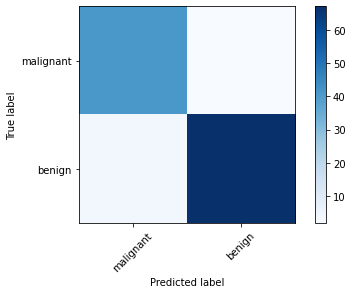

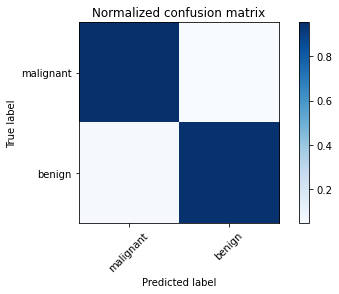

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

diagnosis = cancer.target_names

#python function, defined here to plot confusion matrices
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, diagnosis, title='')

#graphical plots of confusion matrix using method above
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, diagnosis, title='Normalized confusion matrix')
plt.show()

#### Standard scaler

Data is often scaled before learning, and StandardScaler is one class that does this. This transforms data so that has a normal distribution with a mean of 0 and a standard deviation of 1. This means that all features are distributed across the same distribution, hence the learning algorithm isn't biased by the magnitude of values.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### Confusion Matrices with scikit-learn

Scikit-learn has recently added a Confusion Matrix Display, giving you another similar way of producing confusion matrices.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Below, the above is repeated using a standard scaling on the data and the scikit-learn confusion matrix.

[9.03e+00 1.73e+01 5.88e+01 2.50e+02 1.07e-01 1.41e-01 3.13e-01 4.37e-02
 2.11e-01 8.05e-02 3.27e-01 1.19e+00 1.89e+00 1.77e+01 9.55e-03 8.61e-02
 3.04e-01 3.32e-02 4.20e-02 9.56e-03 1.03e+01 2.26e+01 6.55e+01 3.25e+02
 1.48e-01 4.36e-01 1.25e+00 1.75e-01 4.23e-01 1.17e-01]
[-1.44 -0.44 -1.36 -1.14  0.78  0.72  2.82 -0.12  1.09  2.46 -0.26 -0.02
 -0.47 -0.47  0.84  3.25  8.44  3.39  2.62  2.06 -1.23 -0.48 -1.25 -0.97
  0.72  1.19  4.67  0.93  2.1   1.89]
Accuracy: 0.97


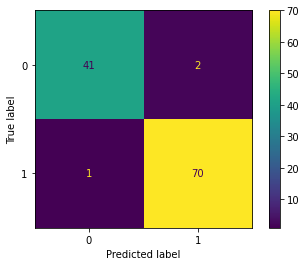

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train[0])
print(X_train_std[0])

ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)

# Train the model
ppn.fit(X_train_std,y_train)

# Make predication
y_pred = ppn.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)

# Evaluate accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ppn.classes_)
disp.plot()
plt.show()